<a href="https://colab.research.google.com/github/ArunadeviRamesh/Content-Based-Image-Retrieval-using-Autoencoders-Unsupervised-deep-learning-algorithms/blob/master/Similar_Image_Retrieval_using_autoencoder_using_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.neighbors import NearestNeighbors
from multiprocessing import Pool
from skimage.transform import resize
import os
import skimage.io
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import manifold
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls "/content/drive/My Drive/ImageRetrieval/Dataset/test"

asparagus3_resized.jpg	    burger1_resized.jpeg  frame183.jpg	frame2.png
building01_front_noon.jpg   face_403.jpg	  frame183.png	steak1_resized.jpg
building02_front_cloud.jpg  face_443.jpg	  frame2.jpg


In [7]:
def __init__(self, modelName, info):
        self.modelName = modelName
        self.info = info
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
def fit(self, X, n_epochs=50, batch_size=256):
        indices_fracs = split(fracs=[0.9, 0.1], N=len(X), seed=0)
        X_train, X_valid = X[indices_fracs[0]], X[indices_fracs[1]]
        self.autoencoder.fit(X_train, X_train,
                             epochs = n_epochs,
                             batch_size = batch_size,
                             shuffle = True,
                             validation_data = (X_valid, X_valid))
def predict(self, X):
        return self.encoder.predict(X)

In [8]:
def set_arch(self):

        shape_img = self.info["shape_img"]
        shape_img_flattened = (np.prod(list(shape_img)),)

        # Set encoder and decoder graphs
        if self.modelName == "simpleAE":
            encode_dim = 128

            input = tf.keras.Input(shape=shape_img_flattened)
            encoded = tf.keras.layers.Dense(encode_dim, activation='relu')(input)

            decoded = tf.keras.layers.Dense(shape_img_flattened[0], activation='sigmoid')(encoded)

        elif self.modelName == "convAE":
            n_hidden_1, n_hidden_2, n_hidden_3 = 16, 8, 8
            convkernel = (3, 3)  # convolution kernel
            poolkernel = (2, 2)  # pooling kernel

            input = tf.keras.layers.Input(shape=shape_img)
            x = tf.keras.layers.Conv2D(n_hidden_1, convkernel, activation='relu', padding='same')(input)
            x = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)
            x = tf.keras.layers.Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
            x = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)
            x = tf.keras.layers.Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(x)
            encoded = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)

            x = tf.keras.layers.Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(encoded)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            x = tf.keras.layers.Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            x = tf.keras.layers.Conv2D(n_hidden_1, convkernel, activation='relu')(x)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            decoded = tf.keras.layers.Conv2D(shape_img[2], convkernel, activation='sigmoid', padding='same')(x)

        else:
            raise Exception("Invalid model name given!")

        # Create autoencoder model
        autoencoder = tf.keras.Model(input, decoded)
        input_autoencoder_shape = autoencoder.layers[0].input_shape[1:]
        output_autoencoder_shape = autoencoder.layers[-1].output_shape[1:]

        # Create encoder model
        encoder = tf.keras.Model(input, encoded)  # set encoder
        input_encoder_shape = encoder.layers[0].input_shape[1:]
        output_encoder_shape = encoder.layers[-1].output_shape[1:]

        # Create decoder model
        decoded_input = tf.keras.Input(shape=output_encoder_shape)
        if self.modelName == 'simpleAE':
            decoded_output = autoencoder.layers[-1](decoded_input)  # single layer
        elif self.modelName == 'convAE':
            decoded_output = autoencoder.layers[-7](decoded_input)  # Conv2D
            decoded_output = autoencoder.layers[-6](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-5](decoded_output)  # Conv2D
            decoded_output = autoencoder.layers[-4](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-3](decoded_output)  # Conv2D
            decoded_output = autoencoder.layers[-2](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-1](decoded_output)  # Conv2D
        else:
            raise Exception("Invalid model name given!")
        decoder = tf.keras.Model(decoded_input, decoded_output)
        decoder_input_shape = decoder.layers[0].input_shape[1:]
        decoder_output_shape = decoder.layers[-1].output_shape[1:]
        print("\nautoencoder.summary():")
        print(autoencoder.summary())
        print("\nencoder.summary():")
        print(encoder.summary())
        print("\ndecoder.summary():")
        print(decoder.summary())
        self.autoencoder = autoencoder
        self.encoder = encoder
        self.decoder = decoder

In [9]:
def compile(self, loss="binary_crossentropy", optimizer="adam"):
        self.autoencoder.compile(optimizer=optimizer, loss=acc)

In [10]:
def load_models(self, loss="binary_crossentropy", optimizer="adam"):
        print("Loading models...")
        self.autoencoder = tf.keras.models.load_model(self.info["autoencoderFile"])
        self.encoder = tf.keras.models.load_model(self.info["encoderFile"])
        self.decoder = tf.keras.models.load_model(self.info["decoderFile"])
        self.autoencoder.compile(optimizer=optimizer, loss=loss)
        self.encoder.compile(optimizer=optimizer, loss=loss)
        self.decoder.compile(optimizer=optimizer, loss=loss)

In [11]:

def save_models(self):
        print("Saving models...")
        self.autoencoder.save(self.info["autoencoderFile"])
        self.encoder.save(self.info["encoderFile"])
        self.decoder.save(self.info["decoderFile"])

In [12]:
def read_img(filePath):
    return skimage.io.imread(filePath, as_gray=False)

In [13]:
def read_imgs_dir(dirPath, extensions, parallel=True):
    args = [os.path.join(dirPath, filename)
            for filename in os.listdir(dirPath)
            if any(filename.lower().endswith(ext) for ext in extensions)]
    if parallel:
        pool = Pool()
        imgs = pool.map(read_img, args)
        pool.close()
        pool.join()
    else:
        imgs = [read_img(arg) for arg in args]
    return imgs

In [14]:

def save_img(filePath, img):
    skimage.io.imsave(filePath, img)

In [15]:
def plot_img(img, range=[0, 255]):
    plt.imshow(img, vmin=range[0], vmax=range[1])
    plt.xlabel("xpixels")
    plt.ylabel("ypixels")
    plt.tight_layout()
    plt.show()
    plt.close()

In [16]:
def plot_query_retrieval(img_query, imgs_retrieval, outFile):
    n_retrieval = len(imgs_retrieval)
    fig = plt.figure(figsize=(2*n_retrieval, 4))
    fig.suptitle("First kth similar Image Retrieval (k={})".format(n_retrieval), fontsize=15)

    # Plot query image
    ax = plt.subplot(2, n_retrieval, 0 + 1)
    plt.imshow(img_query)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(4)  # increase border thickness
        ax.spines[axis].set_color('black')  # set to black
    ax.set_title("query",  fontsize=8)  # set subplot title

    # Plot retrieval images
    for i, img in enumerate(imgs_retrieval):
        ax = plt.subplot(2, n_retrieval, n_retrieval + i + 1)
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(1)  # set border thickness
            ax.spines[axis].set_color('black')  # set to black
        ax.set_title("%d same images" % (i+1), fontsize=14)  # set subplot title

    if outFile is None:
        plt.show()
    else:
        plt.savefig(outFile, bbox_inches='tight')
    plt.close()

In [17]:

def plot_tsne(X, imgs, outFile):

    def imscatter(x, y, images, ax=None, zoom=1.0):
        if ax is None:
            ax = plt.gca()
        x, y = np.atleast_1d(x, y)
        artists = []
        for x0, y0, img0 in zip(x, y, images):
            im = OffsetImage(img0, zoom=zoom)
            ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=True)
            artists.append(ax.add_artist(ab))
        ax.update_datalim(np.column_stack([x, y]))
        ax.autoscale()
        return artists

    def plot_embedding(X, imgs, title=None):
        x_min, x_max = np.min(X, 0), np.max(X, 0)
        X = (X - x_min) / (x_max - x_min)

        plt.figure()
        ax = plt.subplot(111)
        for i in range(X.shape[0]):
            plt.text(X[i, 0], X[i, 1], ".", fontdict={'weight': 'bold', 'size': 9})
        if hasattr(offsetbox, 'AnnotationBbox'):
            imscatter(X[:,0], X[:,1], imgs, zoom=0.3, ax=ax)

        plt.xticks([]), plt.yticks([])
        if title is not None:
            plt.title(title, fontsize=18)

    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X)
    plot_embedding(X_tsne, imgs, "t-SNE embeddings")
    if outFile is None:
        plt.show()
    else:
        plt.savefig(outFile, bbox_inches='tight')
    plt.close()

# Plot image reconstructions


In [18]:


def plot_reconstructions(imgs, imgs_reconstruct, outFile,
                         range_imgs=[0, 255],
                         range_imgs_reconstruct=[0, 1]):
    # Create plot to save
    assert len(imgs) == len(imgs_reconstruct)
    fig = plt.figure(figsize=(20, 4))
    fig.suptitle("Image Reconstructions", fontsize=35)
    n = min(len(imgs), 10)
    for i in range(n):

        # Plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(imgs[i],
                   vmin=range_imgs[0],
                   vmax=range_imgs[1])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Plot reconstructed image
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(imgs_reconstruct[i],
                   vmin=range_imgs_reconstruct[0],
                   vmax=range_imgs_reconstruct[1])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    if outFile is None:
        plt.show()
    else:
        plt.savefig(outFile, bbox_inches='tight')
    plt.close()

In [19]:

def apply_transformer(imgs, transformer, parallel=True):
    if parallel:
        pool = Pool()
        imgs_transform = pool.map(transformer, [img for img in imgs])
        pool.close()
        pool.join()
    else:
        imgs_transform = [transformer(img) for img in imgs]
    return imgs_transform

In [20]:
def normalize_img(img):
    return img / 255.

In [21]:

def resize_img(img, shape_resized):
    img_resized = resize(img, shape_resized,
                         anti_aliasing=True,
                         preserve_range=True)
    assert img_resized.shape == shape_resized
    return img_resized

In [22]:
def flatten_img(img):
    return img.flatten("C")

In [23]:
def split(fracs, N, seed):
    fracs = [round(frac, 2) for frac in fracs]
    if sum(fracs) != 1.00:
        raise Exception("fracs do not sum to one!")

    # Shuffle ordered indices
    indices = list(range(N))
    random.Random(seed).shuffle(indices)
    indices = np.array(indices, dtype=int)

    # Get numbers per group
    n_fracs = []
    for i in range(len(fracs) - 1):
        n_fracs.append(int(max(fracs[i] * N, 0)))
    n_fracs.append(int(max(N - sum(n_fracs), 0)))

    if sum(n_fracs) != N:
        raise Exception("n_fracs do not sum to N!")

    # Sample indices
    n_selected = 0
    indices_fracs = []
    for n_frac in n_fracs:
        indices_frac = indices[n_selected:n_selected + n_frac]
        indices_fracs.append(indices_frac)
        n_selected += n_frac

    # Check no intersections
    for a, indices_frac_A in enumerate(indices_fracs):
        for b, indices_frac_B in enumerate(indices_fracs):
            if a == b:
                continue
            if is_intersect(indices_frac_A, indices_frac_B):
                raise Exception("there are intersections!")

    return indices_fracs

In [24]:
def is_intersect(arr1, arr2):
    n_intersect = len(np.intersect1d(arr1, arr2))
    if n_intersect == 0: return False
    else: return True

In [25]:





modelName = "vgg19"  # try: "simpleAE", "convAE", "vgg19"
trainModel = True
parallel = True  # use multicore processing
dataTrainDir = "/content/drive/My Drive/ImageRetrieval/Dataset/train"
dataTestDir = "/content/drive/My Drive/ImageRetrieval/Dataset/test"

In [26]:
outDir = "/content/drive/My Drive/Output images"
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [27]:

extensions = [".jpg", ".jpeg"]
print("Reading train 1 images from '{}'...".format(dataTrainDir))
imgs_train = read_imgs_dir(dataTrainDir, extensions, parallel=parallel)
print("Reading test images from '{}'...".format(dataTestDir))
imgs_test = read_imgs_dir(dataTestDir, extensions, parallel=parallel)
shape_img = imgs_test[1].shape
print("Image shape = {}".format(shape_img))

Reading train 1 images from '/content/drive/My Drive/ImageRetrieval/Dataset/train'...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Reading test images from '/content/drive/My Drive/ImageRetrieval/Dataset/test'...
Image shape = (100, 100, 3)


In [28]:
class AutoEncoder():
    def __init__(self, modelName, info):
        self.modelName = modelName
        self.info = info
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
    def fit(self, X, n_epochs=500, batch_size=256):
        indices_fracs = split(fracs=[0.9, 0.1], N=len(X), seed=0)
        X_train, X_valid = X[indices_fracs[0]], X[indices_fracs[1]]
        self.autoencoder.fit(X_train, X_train,
                             epochs = n_epochs,
                             batch_size = batch_size,
                             shuffle = True,
                             validation_data = (X_valid, X_valid))

    # Inference
    def predict(self, X):
        return self.encoder.predict(X)

    # Set neural network architecture
    def set_arch(self):

        shape_img = self.info["shape_img"]
        shape_img_flattened = (np.prod(list(shape_img)),)

        # Set encoder and decoder graphs
        if self.modelName == "simpleAE":
            encode_dim = 128

            input = tf.keras.Input(shape=shape_img_flattened)
            encoded = tf.keras.layers.Dense(encode_dim, activation='relu')(input)

            decoded = tf.keras.layers.Dense(shape_img_flattened[0], activation='sigmoid')(encoded)

        elif self.modelName == "convAE":
            n_hidden_1, n_hidden_2, n_hidden_3 = 16, 8, 8
            convkernel = (3, 3)  # convolution kernel
            poolkernel = (2, 2)  # pooling kernel

            input = tf.keras.layers.Input(shape=shape_img)
            x = tf.keras.layers.Conv2D(n_hidden_1, convkernel, activation='relu', padding='same')(input)
            x = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)
            x = tf.keras.layers.Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
            x = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)
            x = tf.keras.layers.Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(x)
            encoded = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)

            x = tf.keras.layers.Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(encoded)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            x = tf.keras.layers.Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            x = tf.keras.layers.Conv2D(n_hidden_1, convkernel, activation='relu')(x)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            decoded = tf.keras.layers.Conv2D(shape_img[2], convkernel, activation='sigmoid', padding='same')(x)

        else:
            raise Exception("Invalid model name given!")

        # Create autoencoder model
        autoencoder = tf.keras.Model(input, decoded)
        input_autoencoder_shape = autoencoder.layers[0].input_shape[1:]
        output_autoencoder_shape = autoencoder.layers[-1].output_shape[1:]

        # Create encoder model
        encoder = tf.keras.Model(input, encoded)  # set encoder
        input_encoder_shape = encoder.layers[0].input_shape[1:]
        output_encoder_shape = encoder.layers[-1].output_shape[1:]

        # Create decoder model
        decoded_input = tf.keras.Input(shape=output_encoder_shape)
        if self.modelName == 'simpleAE':
            decoded_output = autoencoder.layers[-1](decoded_input)  # single layer
        elif self.modelName == 'convAE':
            decoded_output = autoencoder.layers[-7](decoded_input)  # Conv2D
            decoded_output = autoencoder.layers[-6](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-5](decoded_output)  # Conv2D
            decoded_output = autoencoder.layers[-4](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-3](decoded_output)  # Conv2D
            decoded_output = autoencoder.layers[-2](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-1](decoded_output)  # Conv2D
        else:
            raise Exception("Invalid model name given!")
        decoder = tf.keras.Model(decoded_input, decoded_output)
        decoder_input_shape = decoder.layers[0].input_shape[1:]
        decoder_output_shape = decoder.layers[-1].output_shape[1:]

        # Generate summaries
        print("\nautoencoder.summary():")
        print(autoencoder.summary())
        print("\nencoder.summary():")
        print(encoder.summary())
        print("\ndecoder.summary():")
        print(decoder.summary())

        # Assign models
        self.autoencoder = autoencoder
        self.encoder = encoder
        self.decoder = decoder

    # Compile
    def compile(self, loss="binary_crossentropy", optimizer="adam"):
        self.autoencoder.compile(optimizer=optimizer, loss=loss)

    # Load model architecture and weights
    def load_models(self, loss="binary_crossentropy", optimizer="adam"):
        print("Loading models...")
        self.autoencoder = tf.keras.models.load_model(self.info["autoencoderFile"])
        self.encoder = tf.keras.models.load_model(self.info["encoderFile"])
        self.decoder = tf.keras.models.load_model(self.info["decoderFile"])
        self.autoencoder.compile(optimizer=optimizer, loss=loss)
        self.encoder.compile(optimizer=optimizer, loss=loss)
        self.decoder.compile(optimizer=optimizer, loss=loss)

    # Save model architecture and weights to file
    def save_models(self):
        print("Saving models...")
        self.autoencoder.save(self.info["autoencoderFile"])
        self.encoder.save(self.info["encoderFile"])
        self.decoder.save(self.info["decoderFile"])

In [29]:
if modelName in ["simpleAE", "convAE"]:

    # Set up autoencoder
    info = {
        "shape_img": shape_img,
        "autoencoderFile": os.path.join(outDir, "{}_autoecoder.h5".format(modelName)),
        "encoderFile": os.path.join(outDir, "{}_encoder.h5".format(modelName)),
        "decoderFile": os.path.join(outDir, "{}_decoder.h5".format(modelName)),
    }
    model = AutoEncoder(modelName, info)
    model.set_arch()

    if modelName == "simpleAE":
        shape_img_resize = shape_img
        input_shape_model = (model.encoder.input.shape[1],)
        output_shape_model = (model.encoder.output.shape[1],)
        n_epochs = 300
    elif modelName == "convAE":
        shape_img_resize = shape_img
        input_shape_model = tuple([int(x) for x in model.encoder.input.shape[1:]])
        output_shape_model = tuple([int(x) for x in model.encoder.output.shape[1:]])
        n_epochs = 500
    else:
        raise Exception("Invalid modelName!")

elif modelName in ["vgg19"]:

    # Load pre-trained VGG19 model + higher level layers
    print("Loading VGG19 pre-trained model...")
    model = tf.keras.applications.VGG19(weights='imagenet', include_top=False,
                                        input_shape=shape_img)
    model.summary()

    shape_img_resize = tuple([int(x) for x in model.input.shape[1:]])
    input_shape_model = tuple([int(x) for x in model.input.shape[1:]])
    output_shape_model = tuple([int(x) for x in model.output.shape[1:]])
    n_epochs = None

else:
    raise Exception("Invalid modelName!")

# Print some model info
print("input_shape_model = {}".format(input_shape_model))
print("output_shape_model = {}".format(output_shape_model))


Loading VGG19 pre-trained model...
80134624/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                           

In [30]:
class ImageTransformer(object):

    def __init__(self, shape_resize):
        self.shape_resize = shape_resize

    def __call__(self, img):
        img_transformed = resize_img(img, self.shape_resize)
        img_transformed = normalize_img(img_transformed)
        return img_transformed



In [31]:

transformer = ImageTransformer(shape_img_resize)
print("Applying image transformer to training images 1...")
imgs_train_transformed = apply_transformer(imgs_train, transformer, parallel=parallel)


Applying image transformer to training images 1...


In [32]:
print("Applying image transformer to test images...")
imgs_test_transformed = apply_transformer(imgs_test, transformer, parallel=parallel)
# Convert images to numpy array


Applying image transformer to test images...


In [33]:
X_train = np.array(imgs_train_transformed).reshape((-1,) + input_shape_model)


In [34]:
X_test = np.array(imgs_test_transformed).reshape((-1,) + input_shape_model)
print(" X_train.shape = {}".format(X_train.shape))
print("X_test.shape = {}".format(X_test.shape))


 X_train.shape = (48, 100, 100, 3)
X_test.shape = (9, 100, 100, 3)


In [35]:
if modelName in ["simpleAE", "convAE"]:
    if trainModel:
        model.compile(loss="binary_crossentropy", optimizer="adam")
        model.fit(X_train, n_epochs=500, batch_size=256)
        model.save_models()
    else:
        model.load_models(loss="binary_crossentropy", optimizer="adam")

In [36]:
print("Inferencing embeddings using pre-trained model...")
E_train = model.predict(X_train)
E_train_flatten = E_train.reshape((-1, np.prod(output_shape_model)))

Inferencing embeddings using pre-trained model...
2/2 [==============================] - 4s 1s/step


In [37]:
E_test = model.predict(X_test)
E_test_flatten = E_test.reshape((-1, np.prod(output_shape_model)))


1/1 [==============================] - 1s 937ms/step


In [38]:
print(" E_train.shape = {}".format(E_train.shape))
print(" E_test.shape = {}".format(E_test.shape))
print(" E_train_flatten.shape = {}".format(E_train_flatten.shape))
print(" E_test_flatten.shape = {}".format(E_test_flatten.shape))

 E_train.shape = (48, 3, 3, 512)
 E_test.shape = (9, 3, 3, 512)
 E_train_flatten.shape = (48, 4608)
 E_test_flatten.shape = (9, 4608)


In [39]:


if modelName in ["simpleAE", "convAE"]:
    print("Visualizing database image reconstructions...")
    imgs_train_reconstruct = model.decoder.predict(E_train)
    if modelName == "simpleAE":
        imgs_train_reconstruct = imgs_train_reconstruct.reshape((-1,) + shape_img_resize)
    plot_reconstructions(imgs_train, imgs_train_reconstruct,
                         os.path.join(outDir, "{}_reconstruct.png".format(modelName)),
                         range_imgs=[0, 255],
                         range_imgs_reconstruct=[0, 1])

In [40]:

print("Fitting k-nearest-neighbour model on training images 1...")
knn = NearestNeighbors(n_neighbors=2, metric="cosine")
knn.fit(E_train_flatten)


Fitting k-nearest-neighbour model on training images 1...


NearestNeighbors(metric='cosine', n_neighbors=2)

In [41]:
print("Image retrieval on test images...")
for i, emb_flatten in enumerate(E_test_flatten):
    _, indices = knn.kneighbors([emb_flatten]) # find k nearest train neighbours
    img_query = imgs_test[i] # query image
    imgs_retrieval = [imgs_train[idx] for idx in indices.flatten()] # retrieval images
    outFile = os.path.join(outDir, "{}_retrieval_{}.png".format(modelName, i))
    plot_query_retrieval(img_query, imgs_retrieval, outFile)


Image retrieval on test images...


In [42]:
print("Visualizing t-SNE on training images...")
outFile = os.path.join(outDir, "{}_tsne.png".format(modelName))
plot_tsne(E_train_flatten, imgs_train, outFile)

Visualizing t-SNE on training images...


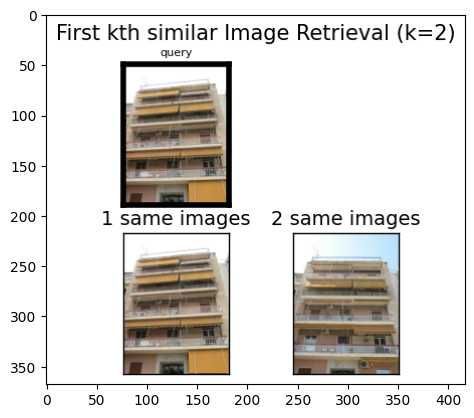

In [43]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path="/content/drive/My Drive/Output images/vgg19_retrieval_0.png"
img = mpimg.imread(img_path)
plt.imshow(img)

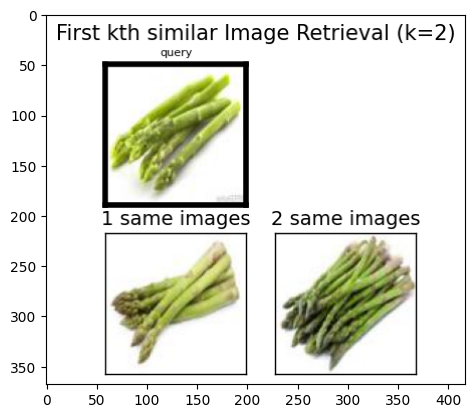

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path="/content/drive/My Drive/Output images/vgg19_retrieval_1.png"
img = mpimg.imread(img_path)
plt.imshow(img)

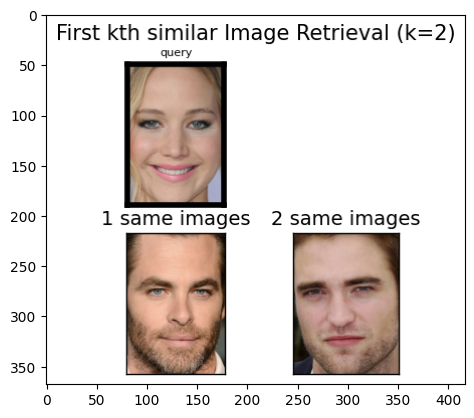

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path="/content/drive/My Drive/Output images/vgg19_retrieval_2.png"
img = mpimg.imread(img_path)
plt.imshow(img)

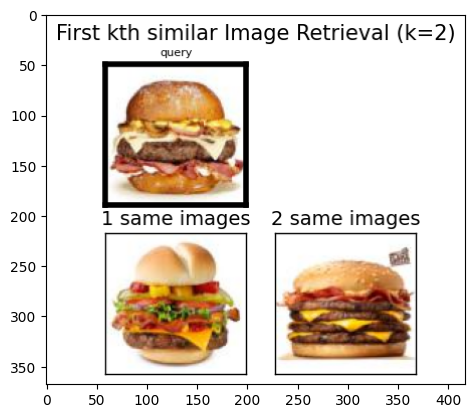

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path="/content/drive/My Drive/Output images/vgg19_retrieval_4.png"
img = mpimg.imread(img_path)
plt.imshow(img)

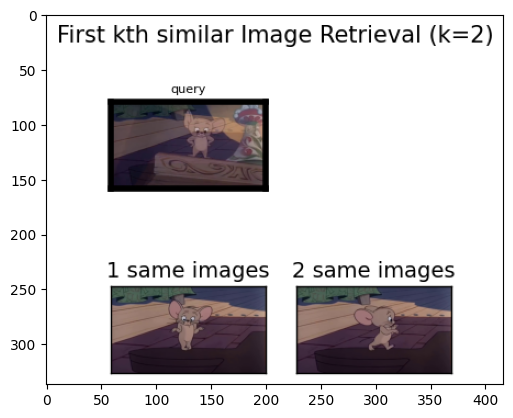

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path="/content/drive/My Drive/Output images/vgg19_retrieval_5.png"
img = mpimg.imread(img_path)
plt.imshow(img)

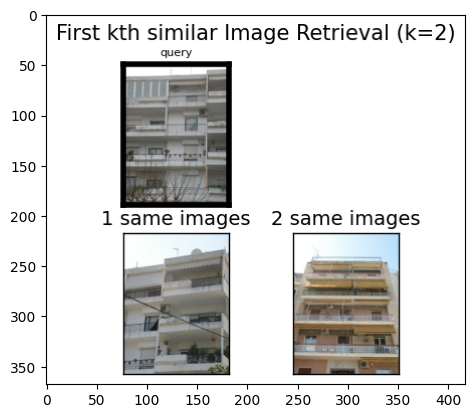

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path="/content/drive/My Drive/Output images/vgg19_retrieval_7.png"
img = mpimg.imread(img_path)
plt.imshow(img)

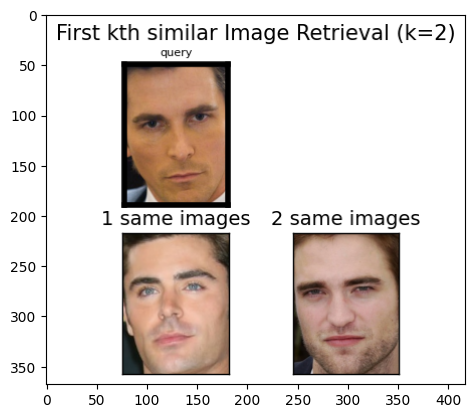

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path="/content/drive/My Drive/Output images/vgg19_retrieval_8.png"
img = mpimg.imread(img_path)
plt.imshow(img)